In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from bmadx.pmd_utils import opal_data_to_bmadx_particle
from bmadx.structures import Particle, Drift, Quadrupole
from bmadx.track import track_lattice_save_particles
from bmadx.plot import plot_projections

In [2]:
opal_file = os.path.join("data", "opal_input_beam.data")

In [3]:
par_in = opal_data_to_bmadx_particle(
    opal_data_file = opal_file
)

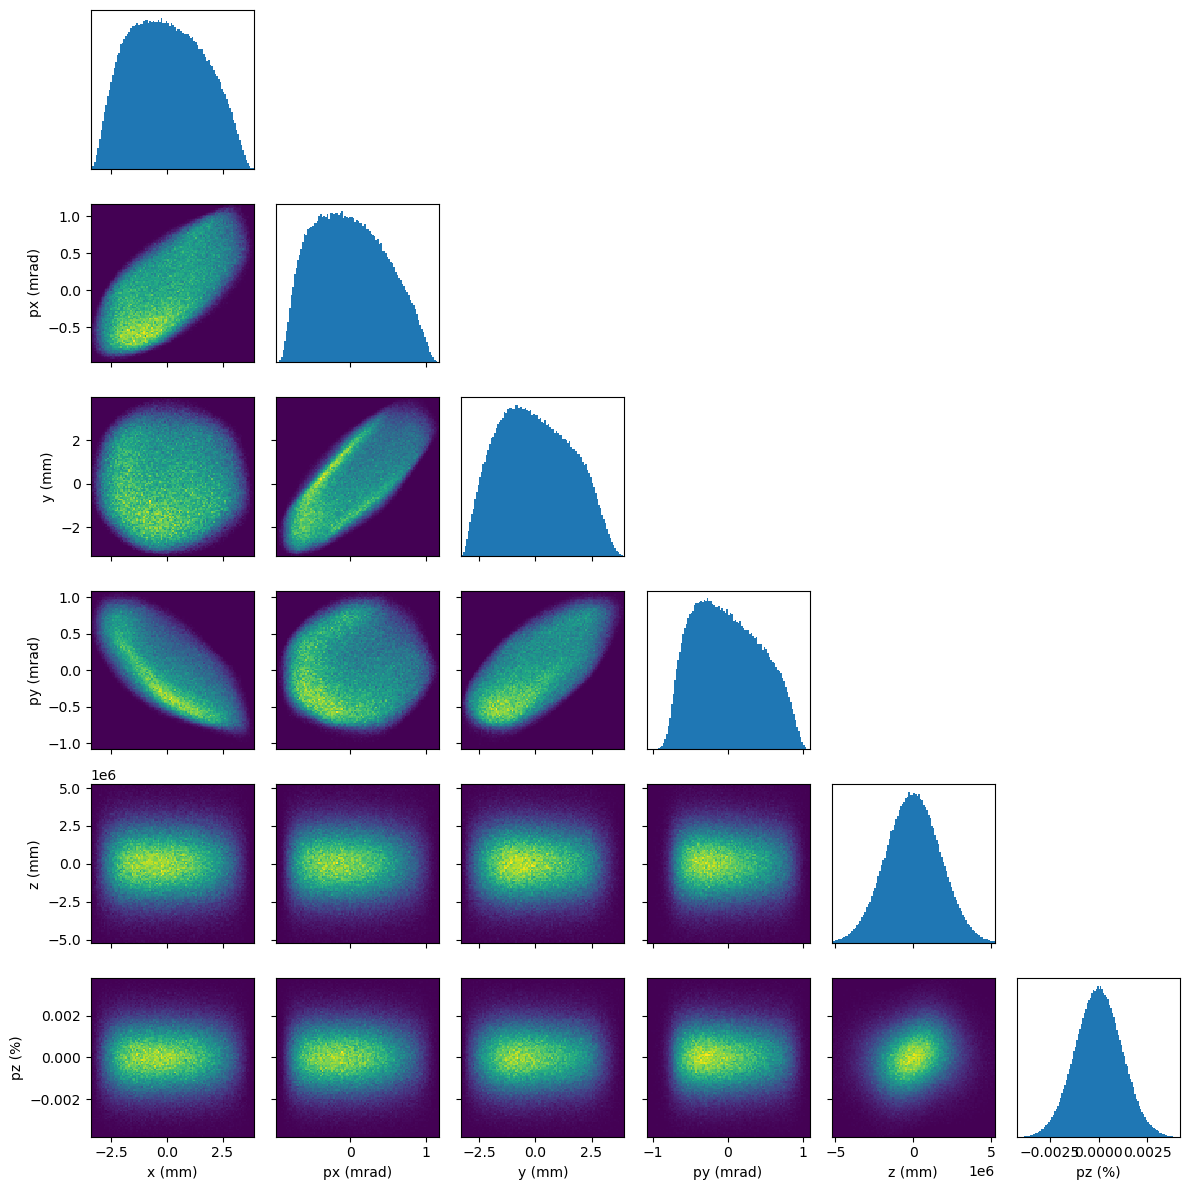

p0c = 43.86803201271241 MeV


In [4]:
# plot 2d projections of input particle
plot_projections(par_in, bins=100)
plt.show()
print(f"p0c = {par_in.p0c*1e-6} MeV")

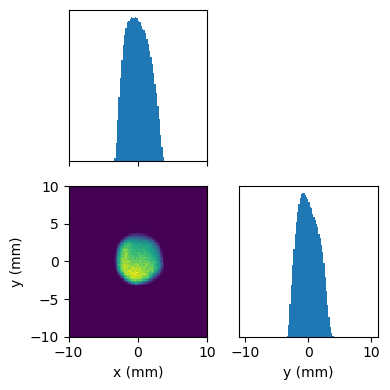

In [5]:
# plot x-y projection of input particle
plot_projections(
    par_in, 
    coords=('x', 'y'), 
    bins = 100,
    same_lims=True, 
    custom_lims=[-10e-3,10e-3]
)
plt.show()

In [6]:
# create Bmad-X lattice
q = Quadrupole(L = 0.12, K1 = 0.00001, NUM_STEPS=5)
d1 = Drift(L = 1.33 - 0.12/2)
d2 = Drift(L = 2.84)
lat = [d1, d2]

# track though lattice saving particles at every element end
all_par = track_lattice_save_particles(par_in, lat)

# get particles at slit and at YAG locations:
par_at_yag = all_par[-1]
par_at_slit = all_par[-2]

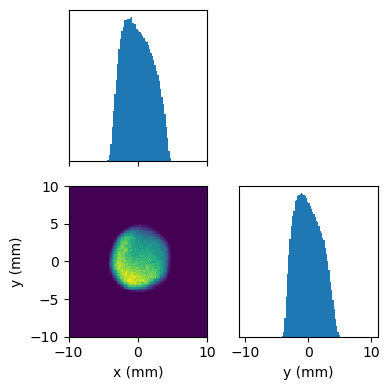

In [7]:
# plot x-y projection of particle at slit
plot_projections(
    par_at_slit, 
    coords=('x', 'y'), 
    bins = 100,
    same_lims=True, 
    custom_lims=[-10e-3,10e-3]
)
plt.show()

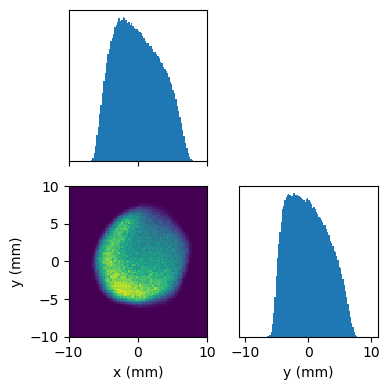

In [8]:
# plot x-y projection of particle at yag
plot_projections(
    par_at_yag, 
    coords=('x', 'y'), 
    bins = 100,
    same_lims=True, 
    custom_lims=[-10e-3,10e-3]
)
plt.show()